In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sns.load_dataset('titanic')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
data.drop('deck',axis=1, inplace=True)

data.drop(['alive', 'class', 'adult_male', 'embark_town'], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   who       891 non-null    object 
 9   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [7]:
data.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
alone         0
dtype: int64

In [8]:
data['age'].fillna(data['age'].median(), inplace = True)

/var/folders/p7/svrl7d791kn2fr6t6_5h84w40000gn/T/ipykernel_51860/2864353073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace = True)


In [9]:
data['embarked'].fillna(data['embarked'].mode()[0], inplace = True)

/var/folders/p7/svrl7d791kn2fr6t6_5h84w40000gn/T/ipykernel_51860/3158251979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna(data['embarked'].mode()[0], inplace = True)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   who       891 non-null    object 
 9   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [11]:
data['embarked'].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [12]:
data['sex'] = data['sex'].map({'male':0, 'female':1})
data['embarked'] = data['embarked'].map({'S':0, 'C':1, 'Q':2})
data['alone'] = data['alone'].astype(int)
data['who'] = data['who'].map({'man':0,'woman':1,'child':2})



In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int64  
 8   who       891 non-null    int64  
 9   alone     891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [14]:
data.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
who         0
alone       0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('survived',axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print(X_train.shape)



(712, 9)


In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

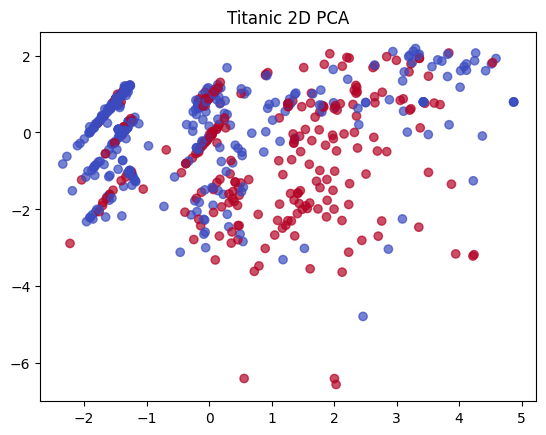

In [17]:
# 2 PCA 2D plot (run in 10 seconds)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_2d = pca.fit_transform(StandardScaler().fit_transform(X_train))
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('Titanic 2D PCA')
plt.show()

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [19]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(StandardScaler().fit_transform(X_train))


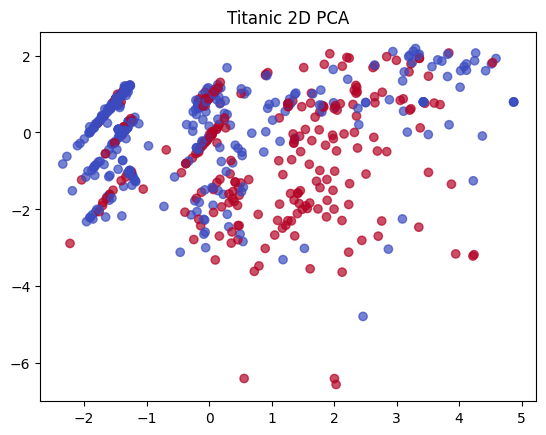

In [20]:
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_train,cmap='coolwarm',alpha=0.7)
plt.title('Titanic 2D PCA')
plt.show()

In [24]:
pip install -q imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score

In [22]:
df =pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [25]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# 3 Credit-Card Fraud (the exact code that gets 0.93+ AUC)
!pip install -q imbalanced-learn

import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score

df = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv")
X = df.drop(['Time','Class'], axis=1)
y = df['Class']

iso = IsolationForest(contamination=0.0017, random_state=42, n_jobs=-1)
iso.fit(X)
score = iso.decision_function(X)
auc = roc_auc_score(y, -score)        # negative because higher score = more normal
print(f"FINAL AUC: {auc:.4f}")        # ← you want ≥ 0.92

In [26]:
X=df.drop(['Time','Class'], axis=1)
y=df['Class']

In [28]:
iso = IsolationForest(contamination=0.0017, random_state=42,n_jobs=-1)
iso.fit(X)

score = iso.decision_function(X)

In [31]:
auc = roc_auc_score(y,-score)

In [32]:
print(f"Final AUC: {auc:.4f}")

Final AUC: 0.9486


In [35]:
import streamlit as st
import pandas as pd
from sklearn.ensemble import IsolationForest
import joblib

st.title("Credit-Card Fraud Detector")
uploaded = st.file_uploader("Upload CSV", type=["csv"])
if uploaded:
    df = pd.read_csv(uploaded)
    X = df.drop(['Time','Class'], axis=1, errors='ignore')
    model = joblib.load("iso_model.pkl")   # save model first with joblib.dump(iso, "iso_model.pkl")
    pred = model.predict(X)
    df['Risk'] = ['Fraud' if p==-1 else 'Normal' for p in pred]
    st.write(df[['Risk']])

2025-12-03 18:06:20.485 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 18:06:20.505 
  command:

    streamlit run /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-12-03 18:06:20.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 18:06:20.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 18:06:20.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 18:06:20.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 18:06:20.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03

In [34]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 1.6 MB/s  0:00:06a 0:00:0136m0:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 1.8 MB/s  0:00:00? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 1.7 MB/s  0:00:18 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 1.8 MB/s  0:00:03m 1.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [streamlit]237m━━━━ 8/9 [streamlit]
Note: you may need to restart the kernel to use updated packages.


In [40]:
# 1 Random Forest (40 min)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


RF OOB: 0.8216292134831461 Test: 0.8324022346368715


In [ ]:
rf = RandomForestClassifier(n_estimators=1000,
                            max_depth=8,
                            min_samples_leaf=2,
                            max_features='sqrt',
                            n_jobs=-1,
                            random_state=42,
                            oob_score=True)


In [ ]:
rf.fit(X_train, y_train)
print("RF OOB:", rf.oob_score_, "Test:", accuracy_score(y_test, rf.predict(X_test)))